In Qiskit:

- **`BasicSimulator()`** is a simple, classical simulator that runs quantum circuits by sampling measurement outcomes. It simulates the classical probabilities of the qubit states based on the measurement results of a circuit. This is useful for simulating the behavior of noisy circuits or when classical outcomes are of interest.

- **`StatevectorEstimator()`** computes expectation values or observables of a quantum circuit using the exact statevector. It provides highly accurate estimates without the need for sampling, as it works directly with the quantum state rather than measurement results.

- **`StatevectorSampler()`** samples from the probability distribution of a quantum state's measurement outcomes. It simulates repeated measurements of the statevector, mimicking how real quantum devices operate, but on an ideal, noiseless quantum state.


### **1. BasicSimulator()**
- **Purpose**: The `BasicSimulator()` is a classical simulator designed to mimic the behavior of quantum devices by generating random measurement outcomes based on a probability distribution derived from the quantum circuit.
- **How it works**: It runs quantum circuits, measures the qubits, and returns sampled counts of different outcomes. The results are based on the classical probabilities that each qubit state is in, as derived from the quantum circuit's execution.
- **Use case**: It's useful for simulating circuits where we are interested in how often certain measurement outcomes occur, much like what you would expect from a real quantum device with noise and classical randomness.
- **Limitations**: It doesn’t give access to the full quantum state. Instead, it focuses on returning measurement results (like `000`, `011`, etc.), making it closer to how real quantum hardware operates but without the actual noise.

### **2. StatevectorEstimator()**
- **Purpose**: The `StatevectorEstimator()` is used to calculate **expectation values** of operators (like Pauli observables) on a quantum state. It is highly accurate and works by using the exact statevector without any measurement or sampling.
- **How it works**: After running a quantum circuit, it provides the exact quantum state (statevector) and applies the operators to compute expectation values. This is particularly useful for variational quantum algorithms and quantum simulations, where precise measurements are necessary.
- **Use case**: Ideal for algorithms where accurate, noiseless results are essential, such as quantum chemistry simulations, optimization problems, or when comparing different circuits’ performance without the randomness of measurements.
- **Limitations**: Since this estimator gives exact results, it doesn't simulate noise or the randomness of real quantum devices. It's also computationally expensive, especially for large numbers of qubits.

### **3. StatevectorSampler()**
- **Purpose**: The `StatevectorSampler()` is designed to simulate measurements by sampling from the **probability distribution** derived from a quantum state's statevector. It mimics how you would measure a quantum state multiple times on a real device.
- **How it works**: Instead of directly calculating expectation values (like the `StatevectorEstimator()`), this sampler generates multiple samples of measurement outcomes based on the underlying quantum state's probability amplitudes. It's closer to how real quantum devices behave but without noise.
- **Use case**: When you want to sample measurement outcomes from a noiseless quantum state, simulating the repeated measurements you'd perform on hardware, but in an idealized setting.
- **Limitations**: While it mimics real device measurements, it doesn’t account for noise or errors that occur in real quantum hardware. It’s limited to sampling the outcomes from the quantum state, so it doesn’t provide the exact statevector for further manipulations like `StatevectorEstimator()`.

### **Summary of Key Differences**
- **BasicSimulator()** gives **classical measurement outcomes** like a real device, based on the probability distribution of the quantum circuit.
- **StatevectorEstimator()** gives **exact expectation values** by working directly with the full quantum statevector, without measurement or sampling.
- **StatevectorSampler()** generates **sampled measurement outcomes** from the ideal quantum state, useful for simulating noiseless repeated measurements.

In [26]:
from qiskit import QuantumCircuit
import qiskit.quantum_info as qi


qc = QuantumCircuit(2)
qc.h(range(1+1))
qc.draw('mpl')
psi = qi.Statevector(qc) 
print(psi)
probs =  psi.probabilities() 
print(probs)
counts = psi.sample_counts(shots = 1024)

Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j],
            dims=(2, 2))
[0.25 0.25 0.25 0.25]


In [27]:
O = qi.SparsePauliOp(['ZZ','II'],[0.5,0.5])
O_exp  = psi.expectation_value(O)
print(O_exp)

(0.4999999999999999+0j)


In [160]:
from qiskit import QuantumCircuit , transpile 
from qiskit.circuit import Parameter
from qiskit.primitives import StatevectorSampler, StatevectorEstimator
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.quantum_info import Pauli, SparsePauliOp
import numpy as np


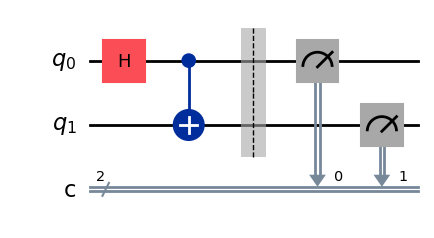

In [161]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)
#qc.ry(Parameter("a"), 0)
qc.barrier()
qc.measure([0,1], [0,1])
qc.draw('mpl')

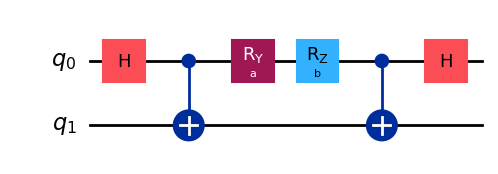

In [162]:
# Define a circuit with two parameters.
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0, 1)
circuit.ry(Parameter("a"), 0)
circuit.rz(Parameter("b"), 0)
circuit.cx(0, 1)
circuit.h(0)
circuit.draw('mpl')

In [163]:
Statevector_Sampler      = StatevectorSampler()
Statevector_Estimator    = StatevectorEstimator()
Basic_Simulator          = BasicSimulator()

In [164]:
# Define a sweep over parameter values, where the second axis is over
# the two parameters in the circuit.
params = np.vstack([
    np.linspace(-np.pi, np.pi, 100),
    np.linspace(-4 * np.pi, 4 * np.pi, 100)
]).T
# Define three observables. Many formats are supported here including
# classes such as qiskit.quantum_info.SparsePauliOp. The inner length-1
# lists cause this array of observables to have shape (3, 1), rather
# than shape (3,) if they were omitted.
observables = [
    [SparsePauliOp(["XX", "IY"], [0.5, 0.5])],
    [Pauli("XX")],
    [Pauli("IY")]
]

In [165]:
job_Statevector_Sampler     = Statevector_Sampler.run([qc] , shots  = 1024)
job_Statevector_Estimator   = Statevector_Estimator.run([(circuit, observables, params)] )
job_Basic_Simulator         = Basic_Simulator.run(qc , shots  = 1024)



In [166]:
stat_smpl_res     = job_Statevector_Sampler.result()
stat_estm_res     = job_Statevector_Estimator.result()
basic_sim_res     = job_Basic_Simulator.result()

In [167]:
counts_stat_smpl_res =stat_smpl_res[0].data.c.get_counts()

counts_basic_sim_res =basic_sim_res.get_counts()

In [168]:

print(f'Statevector_sampler = {counts_stat_smpl_res}')

print(f'Basic_simulator = {counts_basic_sim_res}')


Statevector_sampler = {'00': 516, '11': 508}
Basic_simulator = {'11': 497, '00': 527}


In [169]:
stat_estm_res[0].data

DataBin(evs=np.ndarray(<shape=(3, 100), dtype=float64>), stds=np.ndarray(<shape=(3, 100), dtype=float64>), shape=(3, 100))

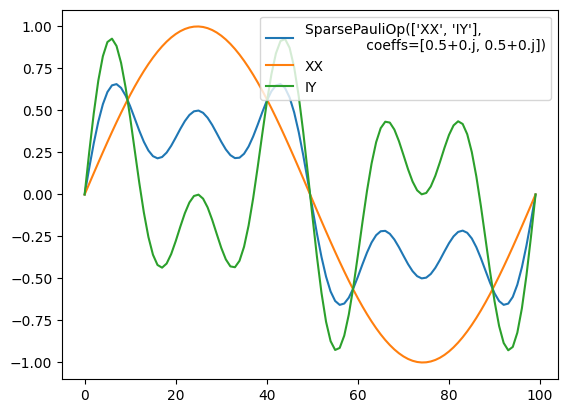

In [170]:
# Pull out the array-based expectation value estimate data from the
# result and plot a trace for each observable.
import matplotlib.pyplot as plt
for idx, pauli in enumerate(observables):
    plt.plot(stat_estm_res[0].data.evs[idx], label=pauli)
plt.legend()